In [ ]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Foam/

!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Foam
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

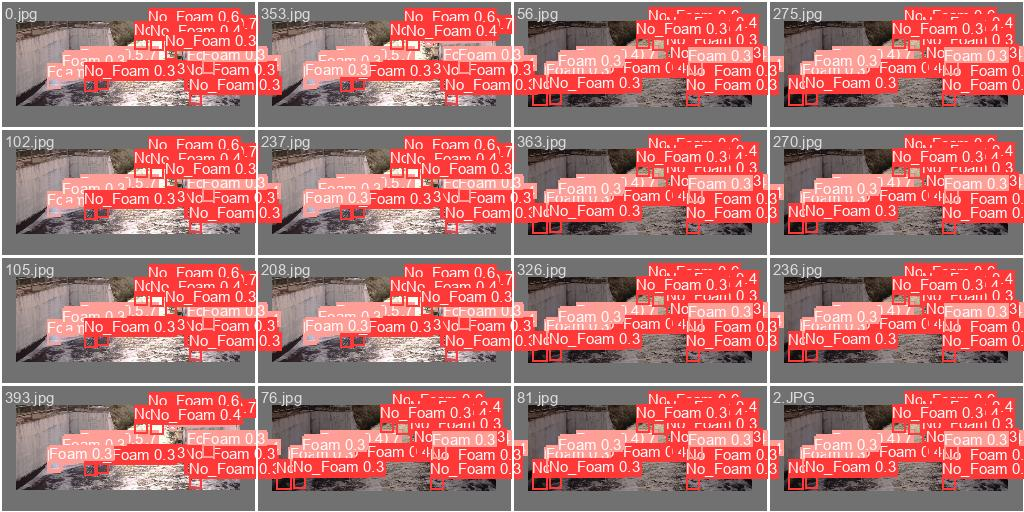

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
!ls runs/detect/train3/

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1717666314.dfd982aa1eab.16082.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch270.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch271.jpg  weights
P_curve.png					     train_batch272.jpg
PR_curve.png					     train_batch2.jpg


In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1gKaooT7ZoAiv_MfjbMMBLv5-IpkVvUMM/data/val/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100% 80/80 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gKaooT7ZoAiv_MfjbMMBLv5-IpkVvUMM/data/val/images/339.jpg: 26 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:17<00:00,  3.49s/it]
                   all         80       5286      0.463      0.495       0.53       0.23
               No_Foam         80       4234      0.387      0.307      0.344      0.122
                  Foam         80       1052       0.54      0.683      0.717      0.339
Speed: 0.3ms preprocess, 39.4ms inference, 0.0ms loss, 33.2ms postprocess per image
Results saved to runs/detect/val5
💡 Le

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/42 /content/drive/MyDrive/Foam/data/test/images/1.JPG: 128x224 11 No_Foams, 8 Foams, 129.6ms
image 2/42 /content/drive/MyDrive/Foam/data/test/images/104.jpg: 192x224 9 No_Foams, 12 Foams, 74.9ms
image 3/42 /content/drive/MyDrive/Foam/data/test/images/11.jpg: 128x224 16 No_Foams, 9 Foams, 12.4ms
image 4/42 /content/drive/MyDrive/Foam/data/test/images/114.jpg: 96x224 12 No_Foams, 12 Foams, 66.3ms
image 5/42 /content/drive/MyDrive/Foam/data/test/images/133.jpg: 192x224 5 No_Foams, 11 Foams, 12.7ms
image 6/42 /content/drive/MyDrive/Foam/data/test/images/134.jpg: 160x224 16 No_Foams, 19 Foams, 74.6ms
image 7/42 /content/drive/MyDrive/Foam/data/test/images/138.jpg: 128x224 20 No_Foams, 19 Foams, 12.4ms
image 8/42 /content/drive/MyDrive/Foam/data/test/images/139.jpg: 128x224 11 No_Foams, 8 Foams, 13.1ms
image 9/42 /con

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -U ultralytics

In [ ]:
import os
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import cv2
import time
from datetime import datetime, timedelta
import subprocess

# Constants
LAST_EMAIL_TIME_FILE = '/content/drive/MyDrive/Foam/last_email_time.txt'
FOAM_CHECK_INTERVAL = timedelta(minutes=15)
TO_EMAIL = 'iisccst8@gmail.com'
video_path = '/content/drive/MyDrive/Foam/data/test/screen_recording.avi'
YOLO_MODEL = '/content/drive/MyDrive/Foam/runs/detect/train3/weights/best.pt'

# Function to send email
def send_email(subject, body, to_email):
    from_email = 'rn889710@gmail.com'
    from_password = 'dwqb zzeq lxxd stfo'  # Use your generated App Password here

    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(from_email, from_password)
        text = msg.as_string()
        server.sendmail(from_email, to_email, text)
        server.quit()
        print(f'Email sent to {to_email}')
    except Exception as e:
        print(f'Failed to send email: {str(e)}')

# Function to perform YOLO detection
def perform_yolo_detection(video_path):
    try:
        result = subprocess.run([
            'yolo',
            'task=detect',
            'mode=predict',
            f'model={YOLO_MODEL}',
            'conf=0.5',
            f'source={video_path}'
        ], capture_output=True, text=True)

        # Check the YOLO output for foam detection
        if "foam" in result.stdout:
            return True
        else:
            return False

    except Exception as e:
        print(f'Error running YOLO detection: {str(e)}')
        return False

# Function to check if water flow is present in the video
def check_water_flow(video_path):
    try:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Failed to open video {video_path}")
            return False

        ret, frame = cap.read()
        if not ret:
            print(f"Failed to read frame from video {video_path}")
            return False

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if cv2.countNonZero(gray_frame) < (gray_frame.size * 0.01):  # 10% threshold
            print(f"No significant water flow detected in video {video_path}")
            return False

        return True
    except Exception as e:
        print(f"Error checking water flow: {str(e)}")
        return False

# Function to get the last email sent time
def get_last_email_time():
    if os.path.exists(LAST_EMAIL_TIME_FILE):
        with open(LAST_EMAIL_TIME_FILE, 'r') as file:
            last_email_time = datetime.fromisoformat(file.read().strip())
            return last_email_time
    return datetime.min

# Function to save the last email sent time
def save_last_email_time():
    with open(LAST_EMAIL_TIME_FILE, 'w') as file:
        file.write(datetime.now().isoformat())

# Main function to run the detection and reporting
def main():
    print("Running main function...")
    # video_name = os.path.basename(video_path)
    # video_name = video_path

    # Check if the video file exists
    # print(f"video_path: {video_path}")
    # print(f"Checking video: {video_name}")

    # if os.path.isfile(video_path):
    if True:
        print(f"Processing {video_path}")

        # Check for water flow
        print("level1")
        water_flow_present = check_water_flow(video_path)
        print("level2")
        if not water_flow_present:
            send_email("No Live Stream", "No live stream detected.", TO_EMAIL)
            return

        # Perform YOLO detection for foam
        print("level3")
        foam_detected = perform_yolo_detection(video_path)
        print("level4")
        if foam_detected:
            send_email("Foam Detected", "Foam is present in the water.", TO_EMAIL)
        else:
            send_email("No Foam Detected", "No foam detected. Water quality is good.", TO_EMAIL)

        # Save the last email time
        save_last_email_time()
    else:
        print(f"Video file does not exist: {video_path}")

# Function to run the main function periodically
def run_periodically():
    while True:
        main()
        print(f"Sleeping for {FOAM_CHECK_INTERVAL.total_seconds()} seconds...")
        time.sleep(FOAM_CHECK_INTERVAL.total_seconds())

# Run the function periodically
if __name__ == "__main__":
    run_periodically()

In [ ]:
LAST_EMAIL_TIME = '/content/drive/MyDrive/video/last_email_time.txt'


In [ ]:
import os

directory = '/content/drive/MyDrive/video/'
if not os.path.exists(directory):
    os.makedirs(directory)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(f"Absolute path of video: {os.path.abspath(VIDEO_PATH)}")


Absolute path of video: /content/drive/MyDrive/video/data/test/KVMS.avi


In [ ]:
video_path = "/content/drive/MyDrive/Foam/data/test/kc_valley.avi"
print(f"file path:{video_path}")
if os.path.isfile(video_path):
    print(f"Processing {video_path}")
else:
    print(f"Video file does not exist: {video_path}")

file path:/content/drive/MyDrive/video/data/test/kc_valley.avi
Video file does not exist: /content/drive/MyDrive/video/data/test/kc_valley.avi


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U ultralytics